In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [12]:
os.getcwd()
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
# Load in csv
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

print(mouse_df.head())
print("##########")
print(clinical_df.head())


  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
##########
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


Merge both using the mouse ID

In [36]:

drug_data = clinical_df.merge(mouse_df, on = 'Mouse ID', how = 'outer')
drug_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


Calculate mean of Tumor Volume per drug

In [15]:

#First group whole df by drug
tumor_bydrug = drug_data.groupby(by = ["Drug", "Timepoint"])
tumor_bydrug.head()

#calculate average of tumor volume
tumor_volavg = tumor_bydrug["Tumor Volume (mm3)"].mean()
tumor_volavg = tumor_volavg.round(2)
tumor_volavg  

#convert to dataframe
tumor_resp_df = pd.DataFrame(tumor_volavg)
tumor_resp_df = tumor_resp_df.reset_index()
tumor_resp_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.00
1,Capomulin,5,44.27
2,Capomulin,10,43.08
3,Capomulin,15,42.06
4,Capomulin,20,40.72


In [16]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#and make dataframe
tumor_volSEM = tumor_bydrug["Tumor Volume (mm3)"].sem()
tumor_volSEM = tumor_volSEM.round(2)
tumor_volSEM_df = pd.DataFrame(tumor_volSEM).reset_index()
tumor_volSEM_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.00
1,Capomulin,5,0.45
2,Capomulin,10,0.70
3,Capomulin,15,0.84
4,Capomulin,20,0.91


In [17]:
# Reshaping the Tumor Volume data frame using Pivot Table
tumor_data_munge = tumor_resp_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
tumor_data_munge.head()

tumor_SEM_munge = tumor_volSEM_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
tumor_SEM_munge.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.45,0.16,0.24,0.26,0.20,0.22,0.23,0.48,0.24,0.19
10,0.70,0.24,0.28,0.36,0.32,0.40,0.38,0.72,0.43,0.26
15,0.84,0.33,0.36,0.58,0.44,0.61,0.47,0.77,0.49,0.37
20,0.91,0.36,0.48,0.73,0.60,0.84,0.56,0.79,0.62,0.53


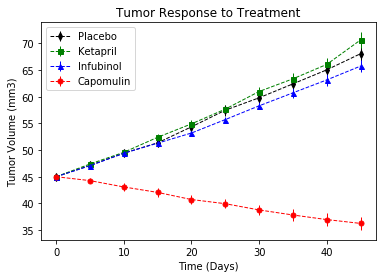

In [21]:
# Generate an errorbar plot
# The 'yerr' argument refers to the error bar for each sample, oriented to the y-axis
plt.errorbar(tumor_data_munge.index, tumor_data_munge["Placebo"], yerr=tumor_SEM_munge["Placebo"], color='k', marker='d', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(tumor_data_munge.index, tumor_data_munge["Ketapril"], yerr=tumor_SEM_munge["Ketapril"], color='g', marker='s', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(tumor_data_munge.index, tumor_data_munge["Infubinol"], yerr=tumor_SEM_munge["Infubinol"], color='b', marker='^', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(tumor_data_munge.index, tumor_data_munge["Capomulin"], yerr=tumor_SEM_munge["Capomulin"], color='r', marker='o', markersize=5, linestyle='dashed', linewidth=1)
x_lim = len(tumor_data_munge.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='upper left')
plt.show()




In [23]:
#Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_metsites = tumor_bydrug["Metastatic Sites"].mean()
tumor_metsites = tumor_metsites.round(2)
tumor_metsites 
# Convert to DataFrame
# Preview DataFrame
tumor_metsites_df = pd.DataFrame(tumor_metsites).reset_index()
tumor_metsites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.16
2,Capomulin,10,0.32
3,Capomulin,15,0.38
4,Capomulin,20,0.65


In [24]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
tumor_metsites_SEM = tumor_bydrug["Metastatic Sites"].sem()
tumor_metsites_SEM = tumor_metsites_SEM.round(2)
tumor_metsites_SEM_df = pd.DataFrame(tumor_metsites_SEM).reset_index()
tumor_metsites_SEM_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.07
2,Capomulin,10,0.13
3,Capomulin,15,0.13
4,Capomulin,20,0.16


In [25]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
metsites_munge = tumor_metsites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metsites_munge.head()

metsites_SEM_munge = tumor_metsites_SEM_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metsites_SEM_munge.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.07,0.11,0.09,0.10,0.09,0.10,0.10,0.07,0.09,0.08
10,0.13,0.15,0.16,0.14,0.16,0.12,0.11,0.09,0.12,0.11
15,0.13,0.18,0.19,0.19,0.16,0.19,0.14,0.12,0.15,0.11
20,0.16,0.24,0.23,0.24,0.18,0.23,0.17,0.12,0.20,0.17


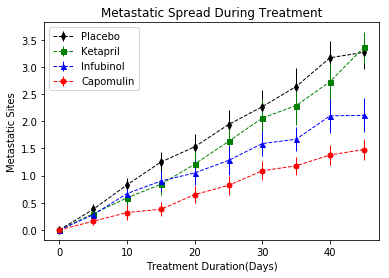

In [26]:
# Generate an errorbar plot
# The 'yerr' argument refers to the error bar for each sample, oriented to the y-axis
plt.errorbar(metsites_munge.index, metsites_munge["Placebo"], yerr=metsites_SEM_munge["Placebo"], color='k', marker='d', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(metsites_munge.index, metsites_munge["Ketapril"], yerr=metsites_SEM_munge["Ketapril"], color='g', marker='s', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(metsites_munge.index, metsites_munge["Infubinol"], yerr=metsites_SEM_munge["Infubinol"], color='b', marker='^', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(metsites_munge.index, metsites_munge["Capomulin"], yerr=metsites_SEM_munge["Capomulin"], color='r', marker='o', markersize=5, linestyle='dashed', linewidth=1)
x_lim = len(metsites_munge.index)
# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration(Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='upper left')
plt.show()

In [27]:
#Survival Rates
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
Mouse_count = tumor_bydrug["Mouse ID"].count()
Mouse_count_df = pd.DataFrame(Mouse_count).reset_index()
Mouse_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
Mouse_count_munge = Mouse_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')  
Mouse_count_munge.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [29]:
#convert to percent survival (divide by total number of initial live mice)
Survival_percent = (100. * Mouse_count_munge / 25).round(0)
Survival_percent.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


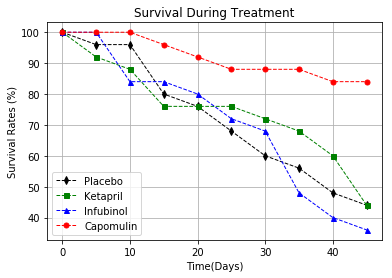

In [30]:
#make scatter plot
# The 'yerr' argument refers to the error bar for each sample, oriented to the y-axis
plt.errorbar(Survival_percent.index, Survival_percent["Placebo"], color='k', marker='d', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(Survival_percent.index, Survival_percent["Ketapril"], color='g', marker='s', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(Survival_percent.index, Survival_percent["Infubinol"], color='b', marker='^', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(Survival_percent.index, Survival_percent["Capomulin"], color='r', marker='o', markersize=5, linestyle='dashed', linewidth=1)
x_lim = len(Survival_percent.index)
plt.grid(True)
# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Time(Days)")
# y label
plt.ylabel("Survival Rates (%)")
# legend 
plt.legend(loc='lower left')
plt.show()


In [31]:
#Summary Bar Graph
# Calculate the percent changes for each drug
drug_perform_1 = tumor_data_munge.tail(1)- 45
drug_perform_2 = (100. * drug_perform_1 / 45).round(4)
drug_perform_2.head()
drug_perform = drug_perform_2.drop(columns=['Ceftamin','Naftisol','Ramicane', 'Stelasyn', 'Propriva', 'Zoniferol'])
drug_perform_3 = pd.melt(drug_perform)
drug_perform_3.head()

,Drug,value
0,Capomulin,-19.4667
1,Infubinol,46.1333
2,Ketapril,57.0222
3,Placebo,51.2889


In [32]:
#Store all Relevant Percent Changes into a Tuple
perfchange = drug_perform_3.loc[: ,'value'].tolist()
perfname = drug_perform_3.loc[: ,'Drug'].tolist()
print(perfname)
print(perfchange)

# Splice the data between passing and failing drugs
passdrug = drug_perform_3.value < 0
passdrug.head

['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
[-19.4667, 46.1333, 57.0222, 51.2889]


<bound method NDFrame.head of 0     True
1    False
2    False
3    False
Name: value, dtype: bool>

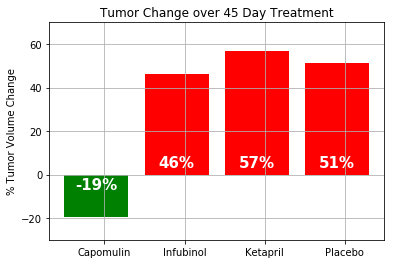

In [35]:
# Orient widths. Add labels, tick marks, etc.
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')
#puts drug names as labels
xlabels = perfname
# Create the ticks for our bar chart's x axis
x_axis = np.arange(len(drug_perform_3.value))
tick_locations = [value+0.5 for value in x_axis]
plt.xticks(tick_locations, xlabels)
#plot bargraph with assigned nme to use for function
perfplot = plt.bar(perfname, perfchange, align='edge', color=passdrug.map({True:'green', False:'red'}))
    
# Create functions to label the percentages of changes
def chartlabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(bar.get_x() + bar.get_width()/2., label_position,
                '%d' % int(height)+'%',size=15,weight='bold',color='white',
                ha='center', va='bottom')
                 
# Call functions to implement the function calls
chartlabel(perfplot)
#show the graph
plt.show()

**********************************************************************************

Observable Trends

"Capomulin is the most effective drug against tumor size growth." 
"It is moderately more effective against tumor metastasis, than others in its group."
"Even though infubinol decreases metastasis almost as well as Capomulin,the survival rate on this medication is the poorest in this group and as such renders it innefective against tumor treatment"
"Ketapril is the worst performing medication in this group against treatment of Squamous cell Carcinoma"
